In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt
import warnings

no display found. Using non-interactive Agg backend


In [2]:
wine_df=pd.read_csv(r'winequality-red.csv')
wine_df.shape

(1599, 12)

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine_df['quality'] = pd.cut(wine_df['quality'], bins=[2, 6.5, 8], labels=["Bad", "Good"])
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Bad


In [9]:
pip install graphviz


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pydotplus


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


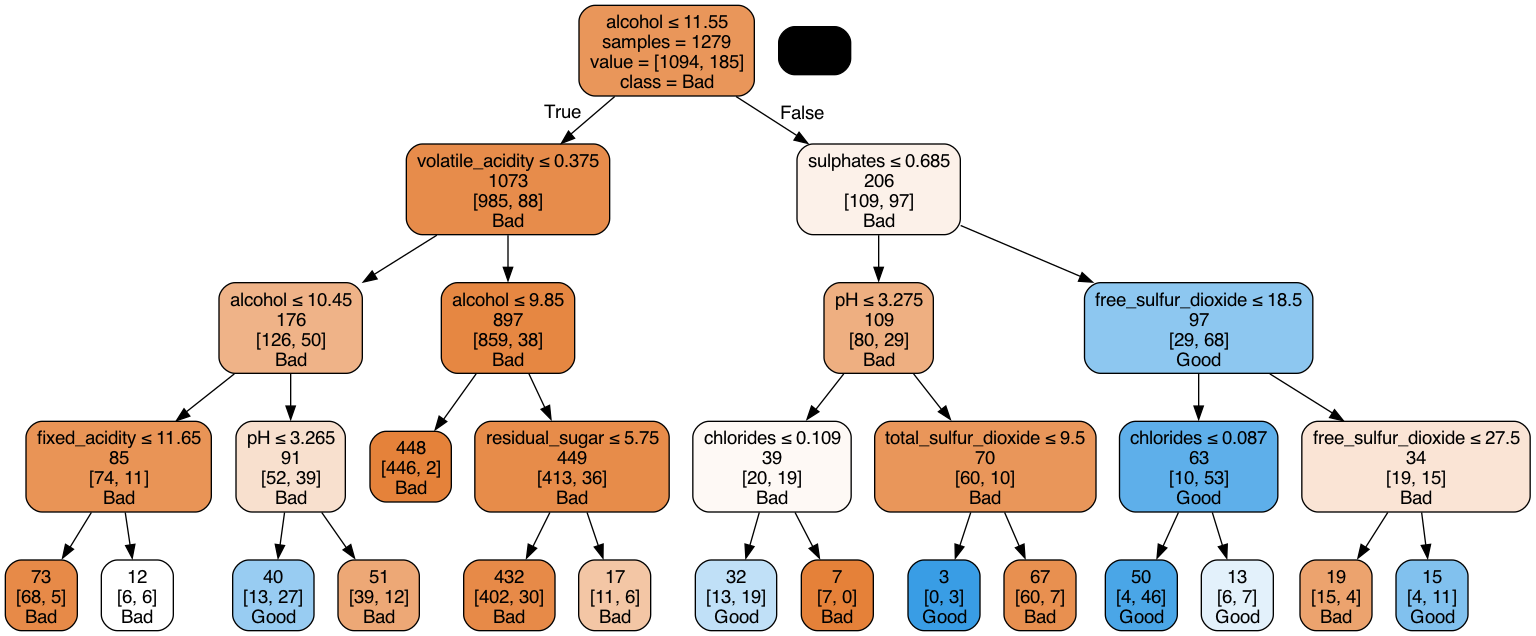

In [11]:
# predictor and outcome variables for the dataset
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# training the test data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# classification tree using training data
wine_tree = DecisionTreeClassifier(max_depth=4,min_impurity_decrease=0.001,min_samples_split=30)
wine_tree.fit(train_X, train_y)

#Using plotDecisionTree() to visualize 
plotDecisionTree(wine_tree, feature_names=train_X.columns,class_names=wine_tree.classes_)

In [12]:
tree_nodes = wine_tree.tree_.node_count
print('nodes:', tree_nodes)

nodes: 29


In [13]:
# classificationSummary()-used for getting accuray measures
# confusion matrix for the training.
print('Training data Partition')
classificationSummary(train_y, wine_tree.predict(train_X))

#  confusion matrix for validation. 
print()
print('Validation data Partition')
classificationSummary(valid_y, wine_tree.predict(valid_X))

Training data Partition
Confusion Matrix (Accuracy 0.9124)

       Prediction
Actual    0    1
     0 1054   40
     1   72  113

Validation data Partition
Confusion Matrix (Accuracy 0.8812)

       Prediction
Actual   0   1
     0 267  21
     1  17  15


In [15]:
# Apply grid search to improve classification results
# using improved grid search method
# cv=5 is that 5-fold cross-validation is used in this case,
# n_jobs=-1 means that the availalbe computer memory (CPU) used to make calculations faster.

parameters_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0,0.0005,0.001], 
    'min_samples_split': list(range(5, 30)),
}

grid_search = GridSearchCV(DecisionTreeClassifier(), 
                parameters_grid, cv=5, n_jobs=-1)
grid_search.fit(train_X, train_y)


print()
print(f'score:{grid_search.best_score_:.4f}')
print('Improved_parameters: ', grid_search.best_params_)


score:0.8882
Improved_parameters:  {'max_depth': 9, 'min_impurity_decrease': 0.0005, 'min_samples_split': 5}


Best Classification Tree for Grid Search


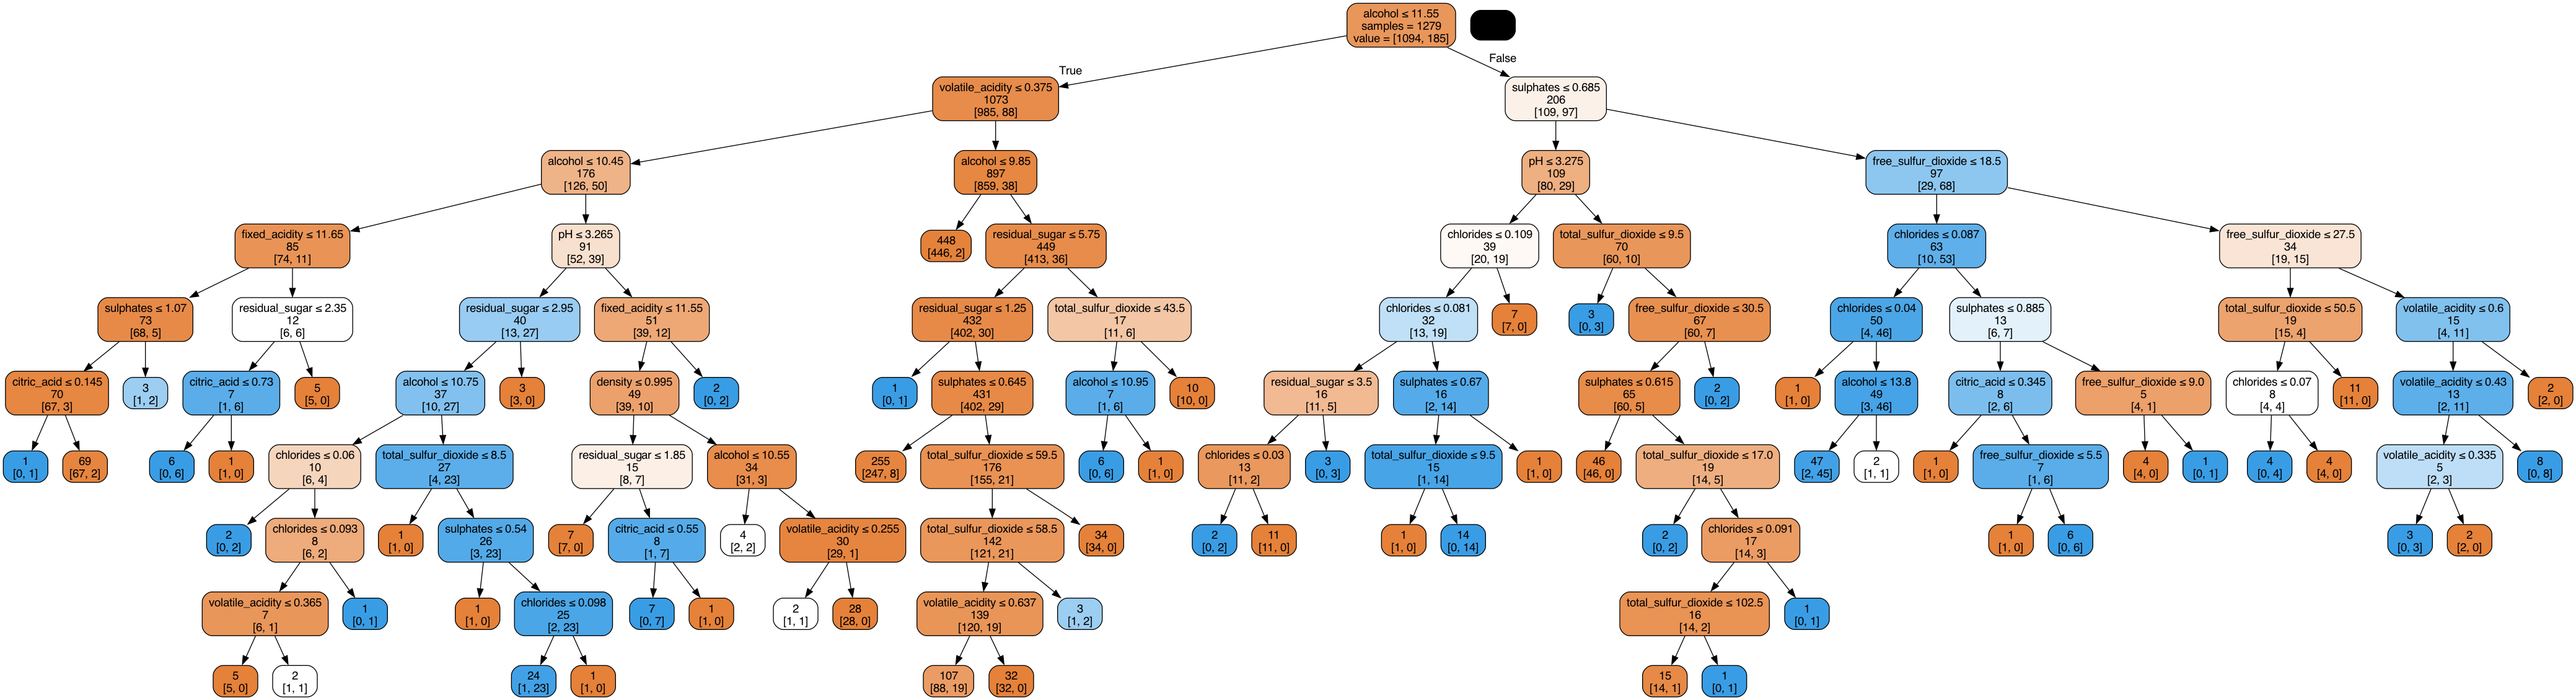

In [16]:
# improved parameter of classification tree
best_Class_Tree = grid_search.best_estimator_

print('Best Classification Tree for Grid Search')
plotDecisionTree(best_Class_Tree, feature_names=train_X.columns)

In [17]:
# training partition
print('Training Partition')
classificationSummary(train_y, best_Class_Tree.predict(train_X))

# validation partition
print()
print('Validation Partition')
classificationSummary(valid_y, best_Class_Tree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9672)

       Prediction
Actual    0    1
     0 1089    5
     1   37  148

Validation Partition
Confusion Matrix (Accuracy 0.8906)

       Prediction
Actual   0   1
     0 271  17
     1  18  14


In [18]:
boost = GradientBoostingClassifier(n_estimators=500, random_state=1)
boost.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [19]:
wine_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.2 KB


<Axes: xlabel='quality', ylabel='fixed_acidity'>

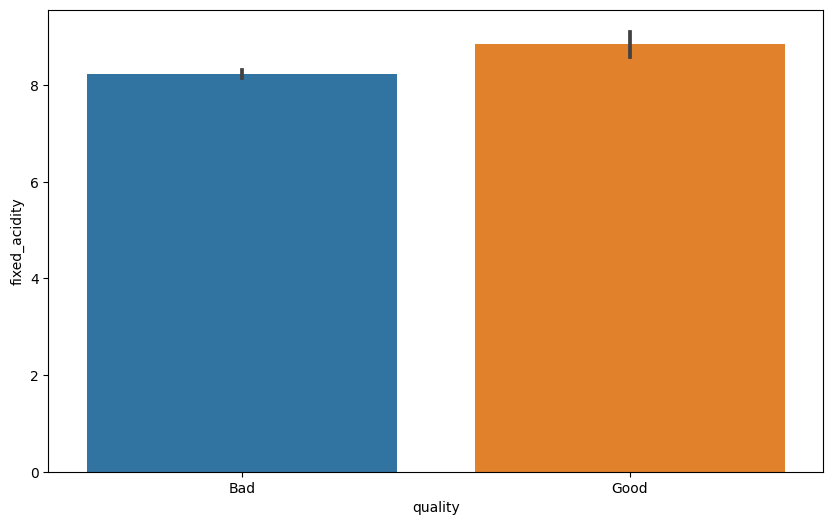

In [20]:
# Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine_df)

<Axes: xlabel='quality', ylabel='volatile_acidity'>

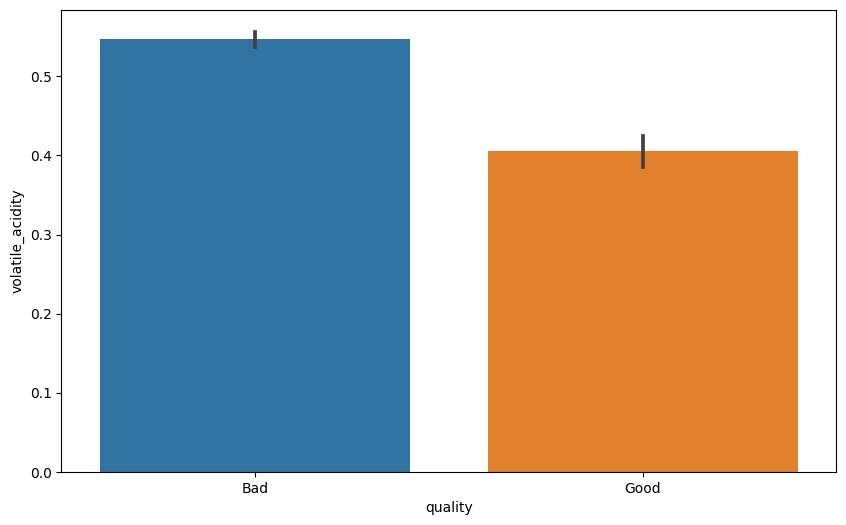

In [21]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine_df)

<Axes: xlabel='quality', ylabel='citric_acid'>

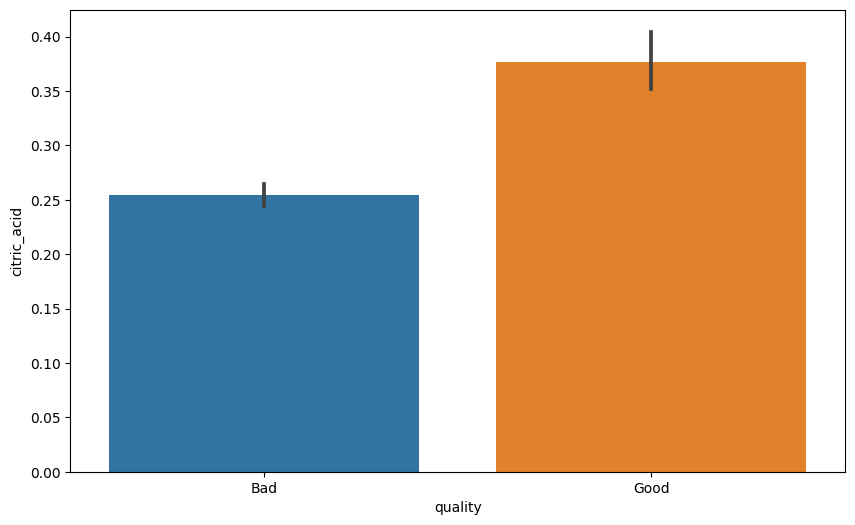

In [22]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine_df)

<Axes: xlabel='quality', ylabel='residual_sugar'>

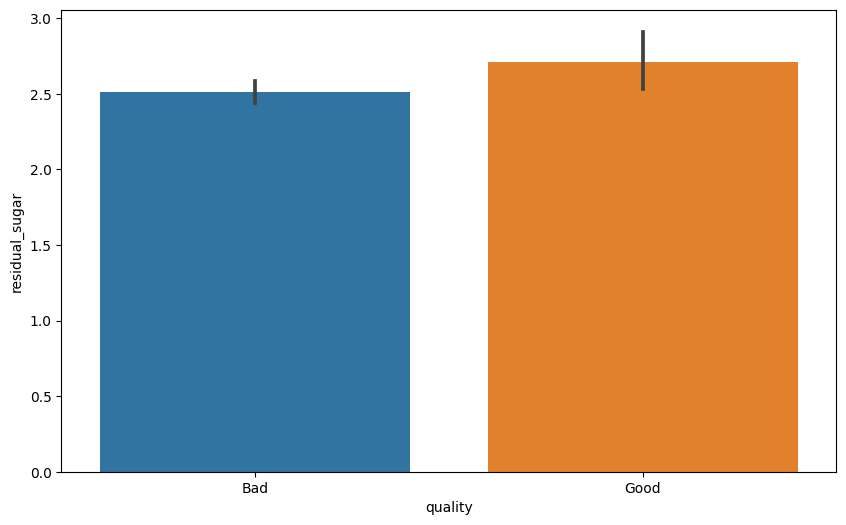

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

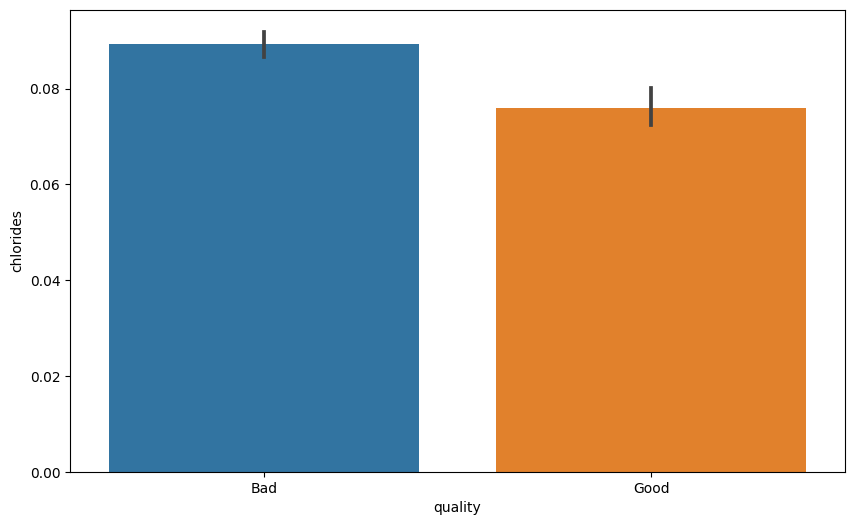

In [24]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_df)

<Axes: xlabel='quality', ylabel='free_sulfur_dioxide'>

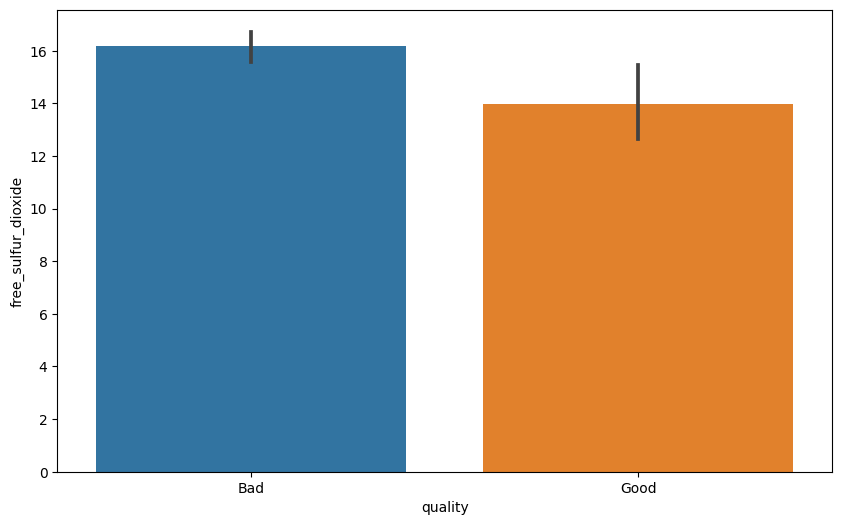

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = wine_df)

<Axes: xlabel='quality', ylabel='total_sulfur_dioxide'>

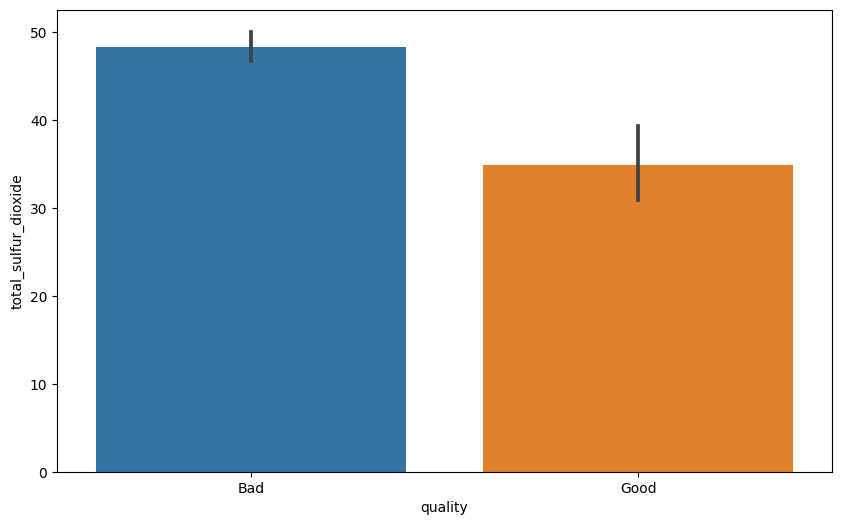

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total_sulfur_dioxide', data = wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

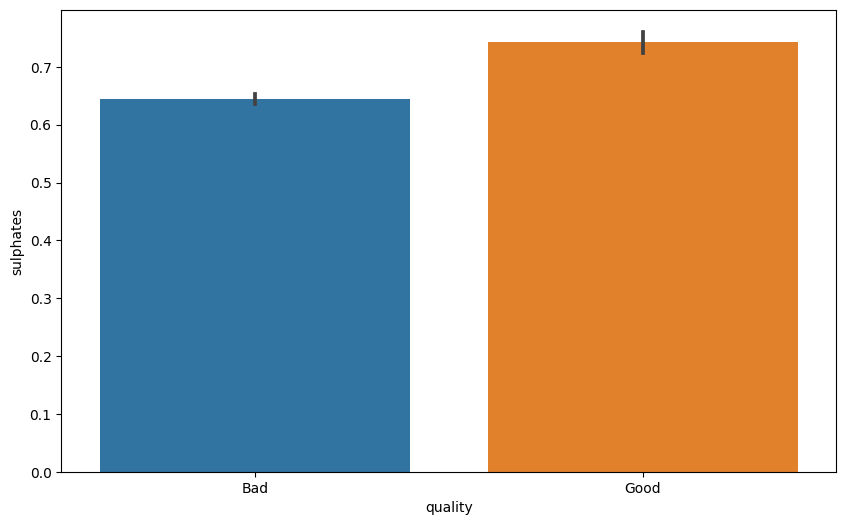

In [27]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_df)

<Axes: xlabel='quality', ylabel='alcohol'>

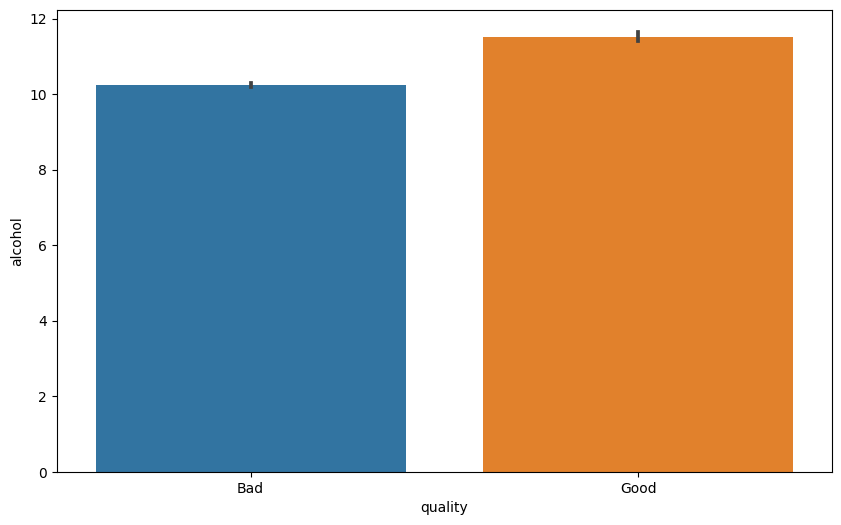

In [28]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_df)

In [29]:
label_quality = LabelEncoder()

In [30]:
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])

In [31]:
wine_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: ylabel='count'>

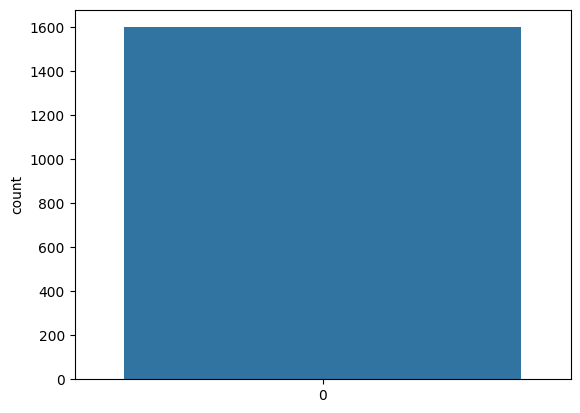

In [32]:
sns.countplot(wine_df['quality'])

In [33]:
#Now seperate the dataset as response variable and feature variabes
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']

In [34]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
#### Logistic Regression model

In [45]:
logisticRegression = LogisticRegression(random_state = 0)
logisticRegression.fit(X_train,y_train)
pred_logisticRegression = logisticRegression.predict(X_test)

In [47]:
print(confusion_matrix(y_test, pred_logisticRegression))

[[268   5]
 [ 35  12]]


In [48]:
accuracy = logisticRegression.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


In [49]:
#### Random Forest Classifier

In [50]:
randomForestClassifier = RandomForestClassifier(n_estimators=200)
randomForestClassifier.fit(X_train, y_train)
pred_randomForestClassifier = randomForestClassifier.predict(X_test)

In [51]:
print(confusion_matrix(y_test, pred_randomForestClassifier))

[[265   8]
 [ 28  19]]


In [52]:
accuracy = randomForestClassifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 88.75 %


In [53]:
#### Support Vector Classifier

In [54]:
supportVectorClassifier = SVC()
supportVectorClassifier.fit(X_train, y_train)
pred_supportVectorClassifier = supportVectorClassifier.predict(X_test)

In [55]:
print(confusion_matrix(y_test, pred_supportVectorClassifier))

[[268   5]
 [ 35  12]]


In [56]:
accuracy = supportVectorClassifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


In [ ]:
#### KNN Classifier

In [57]:
knnClassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knnClassifier.fit(X_train, y_train)
pred_knnClassifier = knnClassifier.predict(X_test)

In [58]:
print(confusion_matrix(y_test, pred_knnClassifier))

[[261  12]
 [ 28  19]]


In [59]:
accuracy = knnClassifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 87.5 %


In [ ]:
#### Naive Bayes classification

In [60]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
pred_naiveBayes = naiveBayes.predict(X_test)

In [61]:
print(confusion_matrix(y_test, pred_naiveBayes))

[[238  35]
 [ 12  35]]


In [62]:
accuracy = naiveBayes.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 85.3125 %
